#### Task 5
##### Problem Statement
**Risk**

I love the board game Risk.

Write a program (or notebook) called **assignment_5_risk** (.py or .ipynb)

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

I am being vague about what it plot, I will leave that to you.

**For the last few marks**.

A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,

and plots the results.

(This is open ended, so it is only for the last few marks)

**Rules of Risk**

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)

If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


##### 5.1 Introduction

In this task, we are to simulate a battle featured in the game "Risk", in which the attacker rolls three dice, and the defender rolls two. The highest two rolls from each side are then compared. If the attacker’s roll beats the defender’s, the defender loses a unit and if not the attacker does.


Let's start by importing our libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

##### 5.2 Simulating a rolling dice
Lets use [np.random.randint](https://medium.com/@ai.mlresearcher/numpy-random-numbers-75b42907e9c4) to simulate rolling dice in just one battle. We will use Numpy's `np.sort` function to sort the elements of the array.

In [2]:
# Idea from https://medium.com/@ai.mlresearcher/numpy-random-numbers-75b42907e9c4. A 1D array of three random integers between 1 and 6 is generated.
# The attacker rolls three times and the defender twice

attackersroll = np.sort(np.random.randint(1, 7, size=3))
defendersroll = np.sort(np.random.randint(1, 7, size=2))

# We print the results of each roll.

print("Attacker's turn:", attackersroll)
print("Defender's turn:", defendersroll)

# We get info about the shape of the array here
print("Attacker's turn:", attackersroll.shape)
print("Defender's turn:", defendersroll.shape)

Attacker's turn: [1 3 6]
Defender's turn: [2 4]
Attacker's turn: (3,)
Defender's turn: (2,)


##### 5.3 Adding a loop
We can see that each time we run this cell, different values are created. Let's introduce a for loop to extend this to five rounds.

In [3]:

# Simulate and display 5 sample rounds
for i in range(5):
    # The attacker rolls three dice, defender rolls two dice
    attackersroll = np.sort(np.random.randint(1, 7, 3))
    defendersroll = np.sort(np.random.randint(1, 7, 2))
    
    # Print results in a single line
    print(f"Round {i + 1}: Attacker's roll: {attackersroll}, Defender's roll: {defendersroll}")




Round 1: Attacker's roll: [1 2 3], Defender's roll: [3 4]
Round 2: Attacker's roll: [1 2 6], Defender's roll: [3 5]
Round 3: Attacker's roll: [3 6 6], Defender's roll: [1 5]
Round 4: Attacker's roll: [3 4 5], Defender's roll: [4 4]
Round 5: Attacker's roll: [1 6 6], Defender's roll: [3 6]


We can see that each round generates a 1D array with 3 elements each. We want to simulate 1000 battles however so we will need to use a 2D array of shape (1000,3).

To code this correctly, we have to understand the rules of Risk. We might think that draws will feature in our results. However, in Risk, a draw is not possible in a single battle between the attacker and defender.

Each battle must have  winner; when the attacker and defender each roll their dice, each pair of dice is compared individually. If the dice roll values are equal, the defender wins the roll (and the attacker loses a unit). Because the defender wins on ties, *there will never be draw*.

Each battle round therefore ends with a definitive outcome: either the attacker or the defender loses one unit for each pair of dice.

##### 5.4 Extending to 1,000 rounds
Let's now define our variables. We want to simulate 1000 rounds, so we'll make `no_of_battles` equal to this. We have looked at the individual details in each *roll* up until now, but now we care about wins. We will want our counters initialized to zero to keep track of the number of rounds each side wins.

In [4]:

# Let's define our variables. We want to simulate 1000 rounds, so we'll make no_of_battles equal to this.
no_of_battles = 1000
attackerlosses, defenderlosses = 0, 0 # We initialize both rounds to zero

For each round, both the attacker and defender roll their dice. The attacker rolls 3 dice, and the defender rolls 2 dice. Each set of dice is sorted in descending order.


[This stackoverflow user](https://stackoverflow.com/a/74421618) recommends grouping the simulation into larger sets, thus focusing on overall stats rather than the details of each battle. It's an efficient approach but doesn't track when the teams draw. 

I prefer to see what's happening in each individual battle, so I'll go with a less efficient but easier to understand (for me) approach. I'll define a function using our random dice rolls that sorts them in ascending order.  I'll use a for loop to compare the dice as per the rules of Risk; it reverses both sorted arrays so that the highest rolls are compared first. For each comparison, if the attacker’s dice is higher, the defender loses a unit; otherwise, the attacker loses a unit. The function tracks the total losses for each side and [returns](https://realpython.com/python-return-statement/) these as `attackerlosses` and `defenderlosses`.

In [5]:
# https://stackoverflow.com/questions/74421396/risk-game-with-python was a starting point 
# we are defining a function to simulate one battle round

def simulatebattle():
    """
    This function simulates one battle round of Risk with 3 attackers versus 2 defenders. It uses ascending order
    sorting & compares largest to smallest numbers.
    """
     # The attacker rolls three dice, defender rolls two dice 
    attackersroll = np.sort(np.random.randint(1, 7, size=3))
    defendersroll = np.sort(np.random.randint(1, 7, size=2))
    
    # Then we want to compare the dice rolls from largest to smallest. We reverse both arrays so we can compare in descending order
    attackerlosses = 0
    defenderlosses = 0
    for attack, defend in zip(attackersroll[::-1], defendersroll[::-1]):  
        if attack > defend:
            defenderlosses += 1
        else:
            attackerlosses += 1
    return attackerlosses, defenderlosses


We'll have `attackertotalwins` and `defendertotalwins` track the cumulative wins for each side across all battles. We'll then use a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp) to categorise battle outcomes into:
- Two attacker wins - Defender loses both units
- Draw - Each side loses one unit
- Two defender wins - Attacker loses both 

##### 5.5 Calling our function
We then call our simulatebattle function which returns two values - attackerlosses and defenderlosses. The total wins are updated based on the losses of the other side.

- `attackertotalwins` increases by the number of defender units lost (`defenderlosses`)
- `defendertotalwins` increases by the number of attacker units lost (`attackerlosses`)

In [6]:
# We now want to initialize results - this tracks the cumulative wins for each side across all battles
attackertotalwins = 0
defendertotalwins = 0
results = {"Two Attacker Wins": 0, "Draw": 0, "Two Defender Wins": 0}

# We now call our simulatebattle function -  this returns two values - attackerlosses and defenderlosses. The total wins are updated based on the losses of the other side.
for _ in range(no_of_battles):
    attackerlosses, defenderlosses = simulatebattle()
    attackertotalwins += defenderlosses
    defendertotalwins += attackerlosses
    if defenderlosses == 2:
        results["Two Attacker Wins"] += 1
    elif attackerlosses == 2:
        results["Two Defender Wins"] += 1
    else:
        results["Draw"] += 1


##### 5.6 Plotting the results

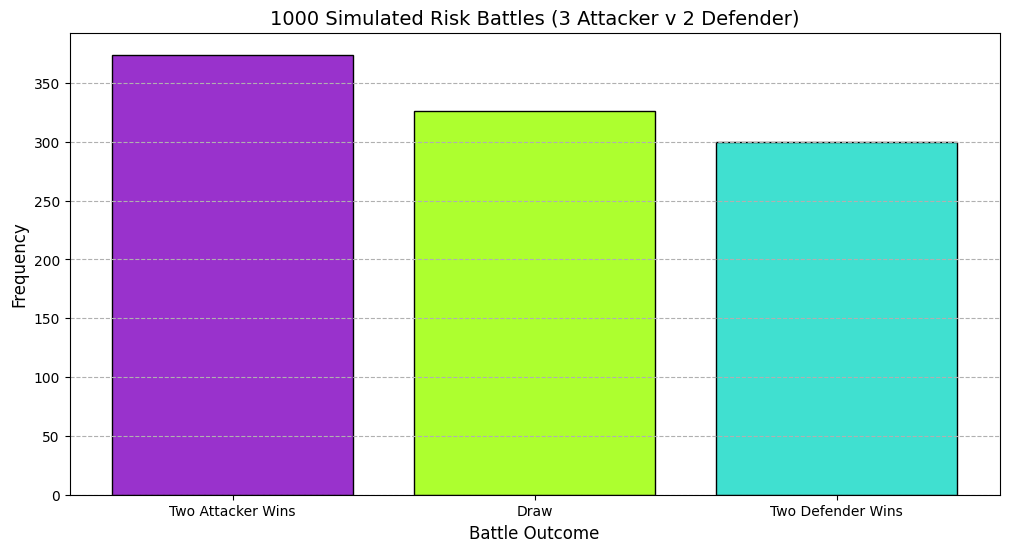

In [7]:

# Plotting the bar chart: Battle Outcome 
plt.figure(figsize=(12, 6))
# Specify colours https://matplotlib.org/stable/gallery/color/named_colors.html

plt.bar(results.keys(), results.values(), color=['darkorchid', 'greenyellow', 'turquoise'], edgecolor='black')
plt.title("1000 Simulated Risk Battles (3 Attacker v 2 Defender)", fontsize=14)
plt.xlabel("Battle Outcome", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()




##### 5.7 Simulating battles until one side is wiped out

In this version, I created a new function called  `simulategame` which takes three inputs: 

- the initial number of attacking troops
- defending troops
- the maximum number of battles allowed. 

We initialize the number of battles to zero like previously but now we want to continue battles while attackers have more than 1 troop, defenders have troops, and battle count is below the limit.
The user inputs the required details, and the final result is printed, summarising the battle series and the remaining troops for each side. We can then call our original `simulatebattle` function - the troop counts for both sides are updated accordingly.

Battles continue until one of the following occurs:

-  one side is wiped out
-  the attackers are reduced to one troop or fewer OR
-  the maximum battle limit is reached. 

The outcome of the simulation is then calculated and printed to the console, describing whether the attackers or defenders won or if the game ended without a decisive winner.

Defining the new function:

In [8]:
# We define a new function with 3 inputs and 1 output
def simulategame(attackercount, defendercount, maxbattles):
    """
    Simulates multiple rounds of Risk battles until one side is wiped out or the number of battles reaches the limit.

    Inputs:
        attackercount: Initial number of attackers (user-input).
        defendercount: Initial number of defenders (user-input).
        maxbattles: Maximum number of battles allowed (user-input).

    Output:
        Result of the battle series and final remaining troops for both sides.

    """
    # Now initialize the number of battles to zero
    battlecount = 0

    # We want to continue battles while attackers have more than 1 troop, defenders have troops, and battle count is below the limit
    while attackercount > 1 and defendercount > 0 and battlecount < maxbattles:
        # Now call our original simulatebattle function
        attackerlosses, defenderlosses = simulatebattle()

        # Update the counts
        attackercount -= attackerlosses
        defendercount -= defenderlosses

        battlecount += 1

    # Calculate the outcome using a conditional statement and include return with ascii face
    if defendercount == 0:
        return f"Attackers win after {battlecount} battles with {attackercount} troops remaining (⊙ _ ⊙)"
    elif attackercount <= 1:
        return f"Defenders win after {battlecount} battles with {defendercount} troops remaining (⊙ _ ⊙)"
    else:
        return f"Game ended after {battlecount} battles. Attackers: {attackercount}, Defenders: {defendercount}"


We can now define our user input parameters:

In [9]:
# Define user input parameters
attackertroops = int(input("Enter the number of attacking troops: "))
defendertroops = int(input("Enter the number of defending troops: "))
maxbattles = int(input("Enter the maximum number of battles: "))



And the run the simulation:

In [10]:
# Run the simulation and display the result
result = simulategame(attackertroops, defendertroops, maxbattles)
print(result)


Defenders win after 3 battles with 5 troops remaining (⊙ _ ⊙)


#### References

- [Numpy Random Numbers](https://medium.com/@ai.mlresearcher/numpy-random-numbers-75b42907e9c4)
- [Risk Game with Python - Stack Overflow](https://stackoverflow.com/questions/74421396/risk-game-with-python)
- [Matplotlib Named Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- [Python Return Statement](https://realpython.com/python-return-statement/)
